# Imports

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tqdm import tqdm
import folium
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# EDA

<div class="alert alert-block alert-success">

* Through our initial cleaning of the data, we observed the the 25th and 75th percentile of release year to be 2013 and 2019 respectively. As a result, we narrowed the scope of our dataset to only include content released between 2010 and 2021.

* The following datasets are the results of preprocessing the initial data which can be found in "Hulu_Cleaning_and_EDA.ipynb" and "Netflix_Cleaning_and_EDA.ipynb".

In [65]:
# Load in Datasets
file_path_1 = 'Netflix_cleaned_1.csv'
file_path_2 = 'Hulu_cleaned_1.csv'
df_netflix = pd.read_csv(file_path_1)
df_hulu = pd.read_csv(file_path_2)
netflix = pd.read_csv(file_path_1)
hulu = pd.read_csv(file_path_2)
hulu_f = pd.read_csv('Hulu_for_difference.csv')

In [66]:
## Additional Preprocessing
# Order columns alphabetically
df_hulu = df_hulu[sorted(df_hulu.columns)]
df_netflix = df_netflix[sorted(df_netflix.columns)]

# Add the service column
df_hulu['service'] = 'hulu'
df_netflix['service'] = 'netflix'

# Combine the dataframes
combined_df = pd.concat([df_hulu, df_netflix], ignore_index=True)
combined_df.to_csv('combined_data.csv', index=False)

df = pd.read_csv('combined_data.csv')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [67]:
netflix.columns

Index(['type', 'country', 'date_added', 'month', 'day', 'year', 'release_year',
       'rating', 'duration_min', 'duration_season', 'difference', 'continent',
       'country_cleaned', 'duration', 'listed_in', 'description', 'show_id',
       'director', 'cast', 'title', 'country_cleaned_2'],
      dtype='object')

In [68]:
netflix_type = netflix.groupby(['year','type']).size().unstack()
hulu_type = hulu.groupby(['year','type']).size().unstack()

netflix_type.fillna(0, inplace=True)
hulu_type.fillna(0, inplace=True)

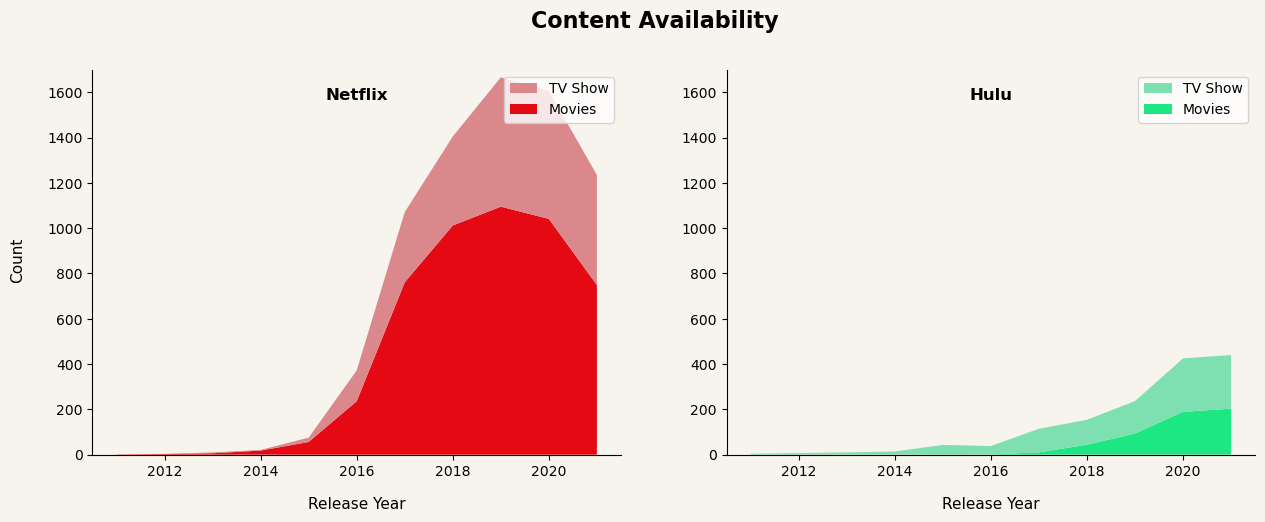

In [69]:
FONT = None
fig, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].stackplot(netflix_type.index, netflix_type['movie'].values, netflix_type['tv show'].values, colors=['#E50914', '#db888c'], 
                labels=['Movies', 'TV Show'])
ax[1].stackplot(hulu_type.index, hulu_type['movie'].values, hulu_type['tv show'].values, colors=['#1ce783', '#7ee0b0'],
                 labels=['Movies', 'TV Show'])

ax[0].set_title("Netflix", fontsize=12, fontweight='bold', x=0.50, y=0.90)
ax[1].set_title("Hulu", fontsize=12, fontweight='bold', x=0.50, y=0.90)

# ax[0].set_xticks(netflix['release_year'].unique(), netflix['release_year'].unique(), font=FONT, fontsize=10)
ax[0].set_xlabel('Release Year', font=FONT, fontsize=11)
ax[0].xaxis.set_label_coords(0.50, -0.11)
# ax[1].set_xticks(netflix['release_year'].unique(), netflix['release_year'].unique(), font=FONT, fontsize=10)
ax[1].set_xlabel('Release Year', font=FONT, fontsize=11)
ax[1].xaxis.set_label_coords(0.50, -0.11)

fig.supylabel('Count', font=FONT, fontsize=11, x=0.07, y=0.50)
ax[0].set_ylabel(None)
ax[1].set_ylabel(None)

ax[0].set_ylim(0, 1700)
ax[1].set_ylim(0, 1700)

fig.suptitle("Content Availability", font=FONT, fontsize=16, fontweight='bold', x=0.50, y=1.0)

ax[0].legend(loc='best', reverse=True)
ax[1].legend(loc='best', reverse=True)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[0].set_facecolor(color='#f7f4ed')
ax[1].set_facecolor(color='#f7f4ed')
fig.patch.set_facecolor(color='#f7f4ed')

plt.show()

<div class="alert alert-block alert-success">

* The movies and tv shows in Netflix are very high in number compared to Hulu.

* Looking at Netflix individually, the movies are more in number compared to tv shows, whereas in Hulu, number of tv shows are a little more than movies during 2010 to 2021.

In [70]:
hulu['duration_season'].replace('na', np.nan, inplace=True)
hulu['duration_min'].replace('missing', np.nan, inplace=True)

hulu['duration_min'] = hulu['duration_min'].astype(float)
hulu['duration_season'] = hulu['duration_season'].astype(float)

/var/folders/3j/84vfyxg527qb8vxdqgjv0r080000gn/T/ipykernel_38022/1667534634.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hulu['duration_season'].replace('na', np.nan, inplace=True)
/var/folders/3j/84vfyxg527qb8vxdqgjv0r080000gn/T/ipykernel_38022/1667534634.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting 

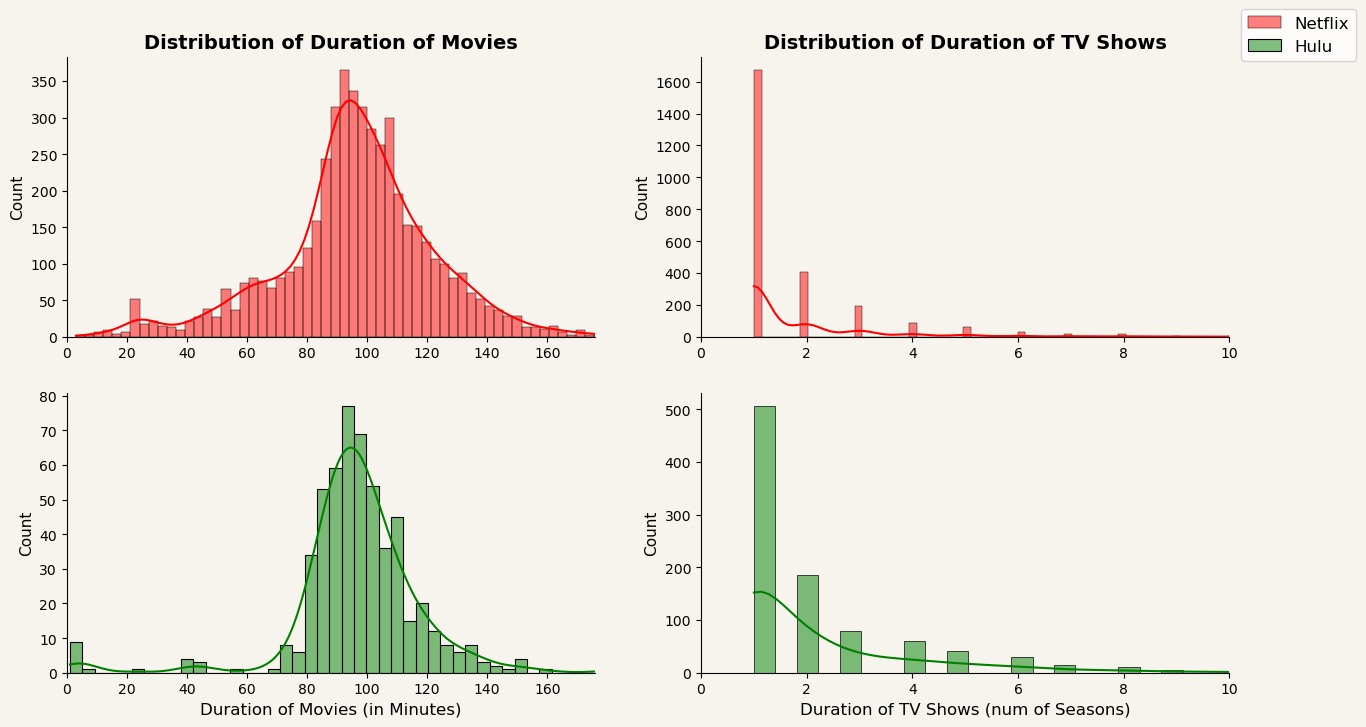

In [71]:
fig, ax = plt.subplots(2,2,figsize=(15,8))
sns.histplot(netflix['duration_min'], label='Netflix', ax=ax[0][0], color='red', kde=True)
sns.histplot(netflix['duration_season'], ax=ax[0][1], color='red', kde=True)
sns.histplot(hulu['duration_min'], label='Hulu', ax=ax[1][0], color='green', kde=True)
sns.histplot(hulu['duration_season'], ax=ax[1][1], color='green', kde=True)

ax[0][0].set_xlim(0,176)
ax[1][0].set_xlim(0,176)
ax[0][1].set_xlim(0,10)
ax[1][1].set_xlim(0,10)

ax[0][0].set_xlabel(None)
ax[1][0].set_xlabel("Duration of Movies (in Minutes)", fontsize=12)
ax[0][1].set_xlabel(None)
ax[1][1].set_xlabel("Duration of TV Shows (num of Seasons)", fontsize=12)
ax[0][0].set_ylabel("Count", fontsize=11)
ax[1][0].set_ylabel("Count", fontsize=11)
ax[0][1].set_ylabel("Count", fontsize=11)
ax[1][1].set_ylabel("Count", fontsize=11)

fig.legend(loc='upper right', bbox_to_anchor=(0.99, 0.95), fontsize=12)
ax[0][0].set_title("Distribution of Duration of Movies", fontsize=14, fontweight='bold')
ax[0][1].set_title("Distribution of Duration of TV Shows", fontsize=14, fontweight='bold')

ax[0][0].spines['top'].set_visible(False)
ax[0][1].spines['top'].set_visible(False)
ax[1][0].spines['top'].set_visible(False)
ax[1][1].spines['top'].set_visible(False)
ax[0][0].spines['right'].set_visible(False)
ax[0][1].spines['right'].set_visible(False)
ax[1][0].spines['right'].set_visible(False)
ax[1][1].spines['right'].set_visible(False)


ax[0][0].set_facecolor(color='#f7f4ed')
ax[0][1].set_facecolor(color='#f7f4ed')
ax[1][0].set_facecolor(color='#f7f4ed')
ax[1][1].set_facecolor(color='#f7f4ed')
fig.patch.set_facecolor(color='#f7f4ed')

plt.show()

<div class="alert alert-block alert-success">

* From the content acquired by Netflix and Hulu, the average duration of movies is 90-100 minutes while the average number of seasons in TV shows are 1-2.

In [72]:
n_continent_type = netflix.groupby(['continent']).count()
n_continent_type.reset_index(inplace=True)
n_continent_type.drop(3, inplace=True)
n_continent_type.sort_values('show_id', inplace=True)

h_continent_type = hulu.groupby(['continent']).count()
h_continent_type.reset_index(inplace=True)
h_continent_type.sort_values('show_id', inplace=True)
h_continent_type = h_continent_type.reindex([5,6,0,3,2,1,4])

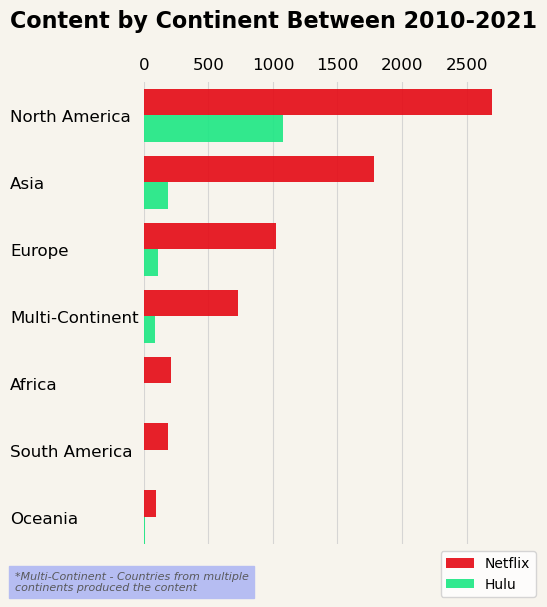

In [73]:
fig, ax = plt.subplots(figsize=(5,6))

ax.barh(np.arange(len(n_continent_type))+0.20, n_continent_type['show_id'].values, height=0.40, color='#E50914', alpha=0.9, 
        zorder=3, label='Netflix')
ax.barh(np.arange(len(h_continent_type))-0.20, h_continent_type['show_id'].values, height=0.40, color='#1ce783', alpha=0.9,
        zorder=3, label='Hulu')

ax.set_yticks(list(range(0,7)))
ax.set_yticklabels(['Oceania', 'South America', 'Africa', 'Multi-Continent', 'Europe', 'Asia', 'North America'],
                    ha='left', x=-0.32, fontsize=12)

ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.set_xlim(0,3000)
ax.set_xticks(list(range(0,2501,500)))
ax.set_xticklabels(list(range(0,2501,500)), fontsize=12)

ax.set_ylim(-0.4,6.5)

ax.set_title("Content by Continent Between 2010-2021", fontsize=16, fontweight='bold', x=0.335, y=1.1)
ax.text(s="*Multi-Continent - Countries from multiple\ncontinents produced the content", color='#59595c',
        fontsize=8, style='italic', x=-1000, y=-1.1, bbox=dict(facecolor='#b6bdf2', alpha=1, edgecolor='#b6bdf2'))

ax.tick_params(bottom=False)
ax.tick_params(left=False)
ax.tick_params(right=False)
ax.tick_params(top=False)

ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

fig.patch.set_facecolor('#f7f4ed')
ax.set_facecolor('#f7f4ed')

ax.grid(axis='x', color='#d6d5d4')
plt.legend(bbox_to_anchor=(1.03, 0.0), fontsize=10)

plt.show()

# Questions from a Business Perspective

<div class="alert alert-block alert-warning">

**1. Looking at trends of how long Netflix and Hulu take to add on content from when the it was first released.**

In [74]:
netflix['date_added'] = pd.to_datetime(netflix['date_added'], format='%Y-%m-%d')
hulu_f['date_added'] = pd.to_datetime(hulu_f['date_added'], format='%Y-%m-%d')

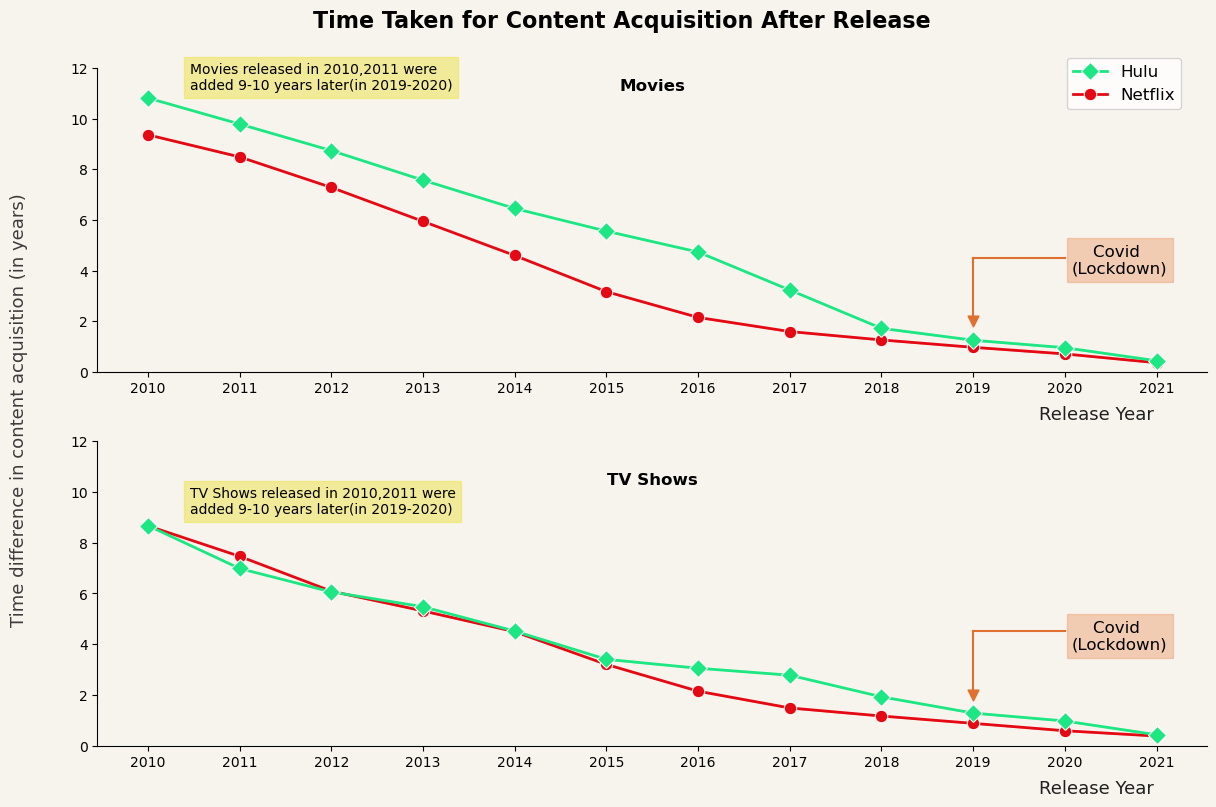

In [75]:
netflix['difference_y'] = round(netflix['difference']/12, 2)
hulu['difference_y'] = round(hulu['difference']/12, 2)
FONT=None

fig, ax = plt.subplots(2, 1, figsize=(12,8))

ax[0] = sns.lineplot(data=netflix[netflix['type']=='movie'], x='release_year', y='difference_y', marker='o', markersize=9, ax=ax[0], color='#E50914',
                     label='Netflix', linewidth=2, errorbar=('ci', False))
ax[0] = sns.lineplot(data=hulu[hulu['type']=='movie'], x='release_year', y='difference_y', marker='D', markersize=9, ax=ax[0], color='#1ce783',
                      label='Hulu', linewidth=2, errorbar=('ci', False))

ax[1] = sns.lineplot(data=netflix[netflix['type']=='tv show'], x='release_year', y='difference_y', marker='o', markersize=9, ax=ax[1], color='#E50914',
                      linewidth=2, errorbar=('ci', False))
ax[1] = sns.lineplot(data=hulu[hulu['type']=='tv show'], x='release_year', y='difference_y', marker='D', markersize=9, ax=ax[1], color='#1ce783',
                      linewidth=2, errorbar=('ci', False))

ax[0].set_title("Movies")
ax[1].set_title("TV Shows")


ax[0].set_xticks(netflix['release_year'].unique(), netflix['release_year'].unique(), font=FONT, fontsize=10)
ax[0].set_xlabel('Release Year', font=FONT, fontsize=13, color='#212020')
ax[0].xaxis.set_label_coords(0.90, -0.11)
ax[1].set_xticks(netflix['release_year'].unique(), netflix['release_year'].unique(), font=FONT, fontsize=10)
ax[1].set_xlabel('Release Year', font=FONT, fontsize=13, color='#212020')
ax[1].xaxis.set_label_coords(0.90, -0.11)
ax[0].set_ylim(0,12)
ax[1].set_ylim(0,12)

fig.supylabel('Time difference in content acquisition (in years)', font=FONT, fontsize=13, x=-0.01, y=0.50, color='#3d3c3c')
ax[0].set_ylabel(None)
ax[1].set_ylabel(None)

fig.suptitle("Time Taken for Content Acquisition After Release", font=FONT, fontsize=16, fontweight='bold', x=0.50, y=1.0)
ax[0].set_title("Movies", font=FONT, fontsize=12, fontweight='bold', x=0.50, y=0.90)
ax[1].set_title("TV Shows", font=FONT, fontsize=12, fontweight='bold', x=0.50, y=0.83)

ax[0].legend_.remove()
fig.legend(loc='upper right', reverse=True, bbox_to_anchor=(0.973, 0.95), fontsize=12)

ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

ax[0].set_facecolor(color='#f7f4ed')
ax[1].set_facecolor(color='#f7f4ed')
fig.patch.set_facecolor(color='#f7f4ed')

fig.text(s='    Covid\n(Lockdown)', x=0.875, y=0.67, fontsize=12, bbox=dict(facecolor='#eda479', alpha=0.5, edgecolor='#eda479'))
ax[0].scatter(2019,2, marker='v', s=60, color='#e0702f')
ax[0].plot([2019,2019], [2,4.5], color='#e0702f')
ax[0].plot([2019,2020], [4.5,4.5], color='#e0702f')

fig.text(s='    Covid\n(Lockdown)', x=0.875, y=0.20, fontsize=12, bbox=dict(facecolor='#eda479', alpha=0.5, edgecolor='#eda479'))
ax[1].scatter(2019,2, marker='v', s=60, color='#e0702f')
ax[1].plot([2019,2019], [2, 4.5], color='#e0702f')
ax[1].plot([2019,2020], [4.5, 4.5], color='#e0702f')

fig.text(s='Movies released in 2010,2011 were\nadded 9-10 years later(in 2019-2020)', x=0.14, y=0.90, fontsize=10, 
         bbox=dict(facecolor='#ede245', alpha=0.5, edgecolor='#ede245'))
fig.text(s='TV Shows released in 2010,2011 were\nadded 9-10 years later(in 2019-2020)', x=0.14, y=0.37, fontsize=10, 
         bbox=dict(facecolor='#ede245', alpha=0.5, edgecolor='#ede245'))

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">

**Key Findings:**

* Over the years, the time taken by Netflix and Hulu to add a Movie or TV Show to their streaming platform (i.e. time taken for content acquisition) has drastically decreased to almost less than a year from the release.

* This decreasing trend is powered by Lockdown because of Covid. The graphs show that the acquisition happenned in less than a year from 2019 (the year when Covid hit).

* An interesting finding from the plot is that, majority of the movies and tv shows that were released before covid (during the years 2010 through 2018) were added in 2019, i.e. during Covid.

* This faster acquisition rate is a very brilliant step which not only boosts their subscription rate but also the customer retention rate.

<div class="alert alert-block alert-warning">

**2. Looking at country wise content production for movies and TV shows on added on Netflix and Hulu.**

In [76]:
netflix_country = netflix['country_cleaned_2'].value_counts().reset_index()
netflix_country.columns = ['country', 'count']

hulu_country = hulu['country_cleaned_2'].value_counts().reset_index()
hulu_country.columns = ['country', 'count']

In [77]:
country_upd = []
for i in range(len(netflix_country)):
    if netflix_country['country'][i] == 'united states':
        country_upd.append("United States")
    else:
        w = netflix_country['country'][i].split(" ")
        w = [i[0].upper()+i[1:] for i in w]
        tmp = " ".join(w)
        country_upd.append(tmp)

netflix_country['country_upd'] = country_upd
netflix_country.drop([1,3], inplace=True)
netflix_country['percentage'] = round((netflix_country['count']/sum(netflix_country['count'].values))*100, 2)
netflix_country['count_log'] = np.log1p(netflix_country['count'])


In [78]:
country_upd = []
for i in range(len(hulu_country)):
    if hulu_country['country'][i] == 'united states':
        country_upd.append("United States")
    else:
        w = hulu_country['country'][i].split(" ")
        w = [i[0].upper()+i[1:] for i in w]
        tmp = " ".join(w)
        country_upd.append(tmp)
hulu_country['country_upd'] = country_upd
hulu_country.drop(2, inplace=True)
hulu_country['percentage'] = round((hulu_country['count']/sum(hulu_country['count'].values))*100, 2)
hulu_country['count_log'] = np.log1p(hulu_country['count'])


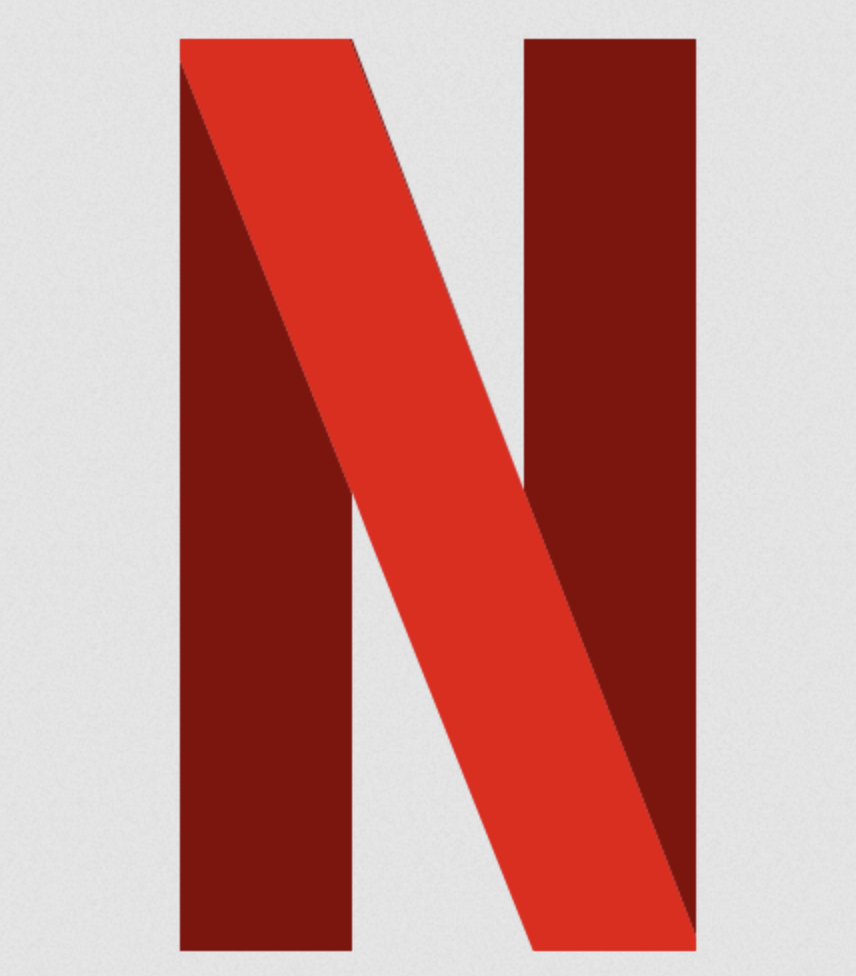
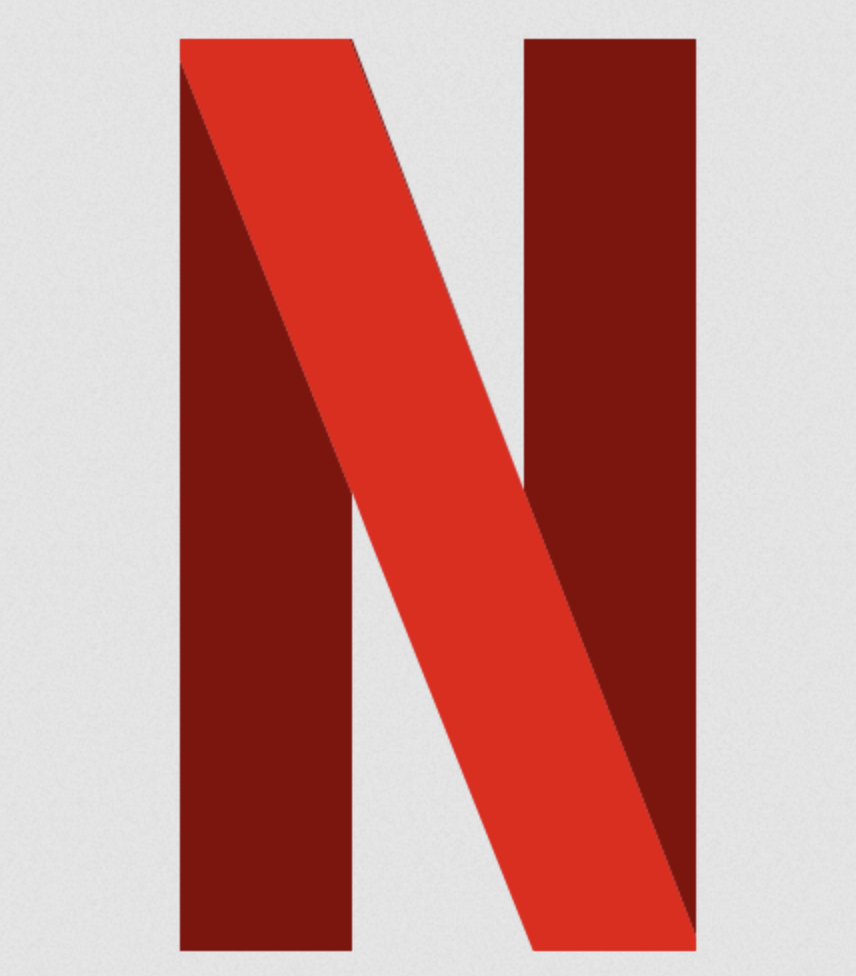
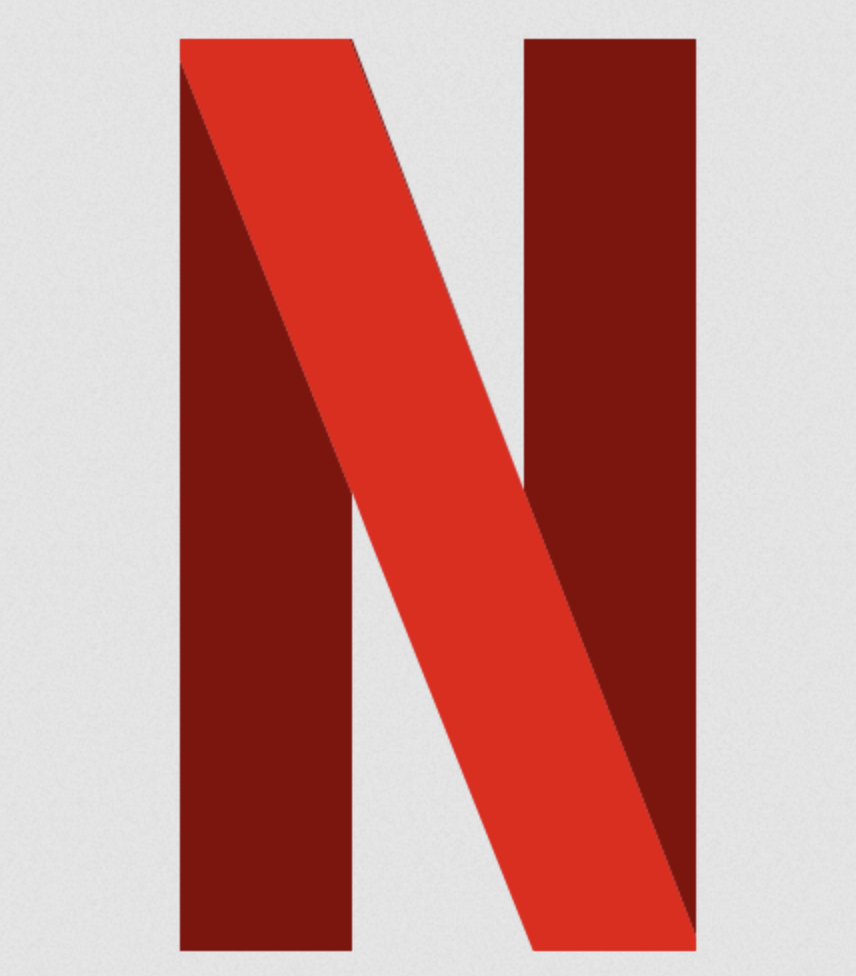

In [79]:
nf = folium.Map(location=[20, 0], zoom_start=2)
geo_json_url = 'https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson'

loc = 'Netflix - Country wise Content Production'
title_html = '''<h3 align="center" style="font-size:16px"><b>{}</b></h3>'''.format(loc)

data = [{'coord':[38, -105], 'text': "United States of America (40.53%)"},
        {'coord': [19, 78], 'text': "India (13.64%)"},
        {'coord': [53,3], 'text': 'United Kingdom (6.76%)'}]
for i in range(len(data)):
    netflix_icon = folium.features.CustomIcon('netflixicon.png', icon_size=(20,20))
    folium.Marker(data[i]['coord'], icon=netflix_icon, popup=folium.Popup(data[i]['text']),).add_to(nf)


folium.Choropleth(
    geo_data=geo_json_url,
    data=netflix_country,
    columns=['country_upd', 'count_log'],
    key_on='feature.properties.name',
    fill_color="Reds",
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Content by Country',
    highlight=True,
    nan_fill_color="#ffffff",
    nan_fill_opacity=0.7,
).add_to(nf)

nf.get_root().html.add_child(folium.Element(title_html))
# m.save('choropleth_map.html')
nf


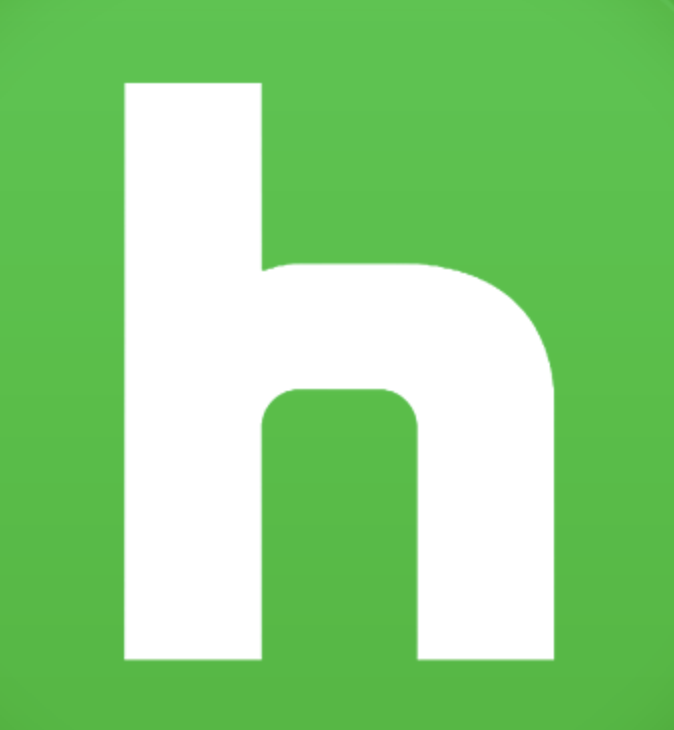
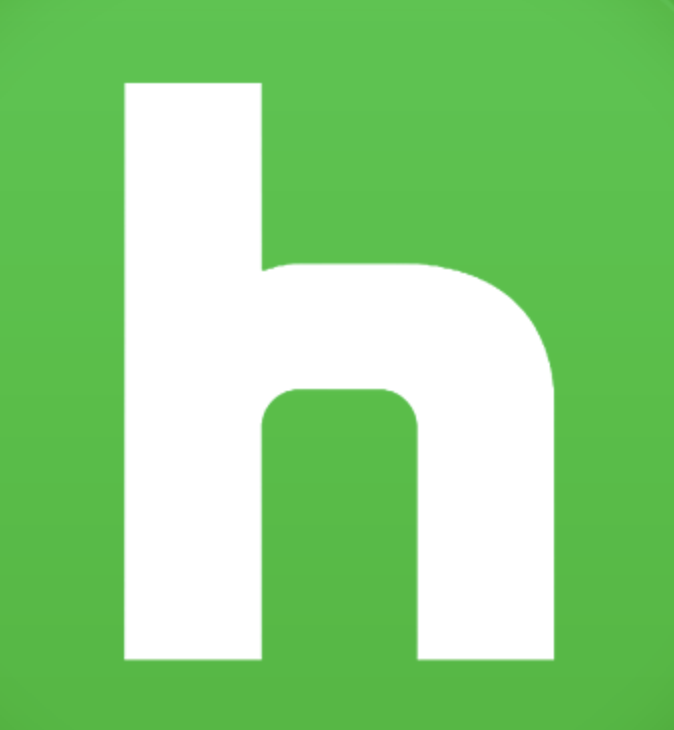
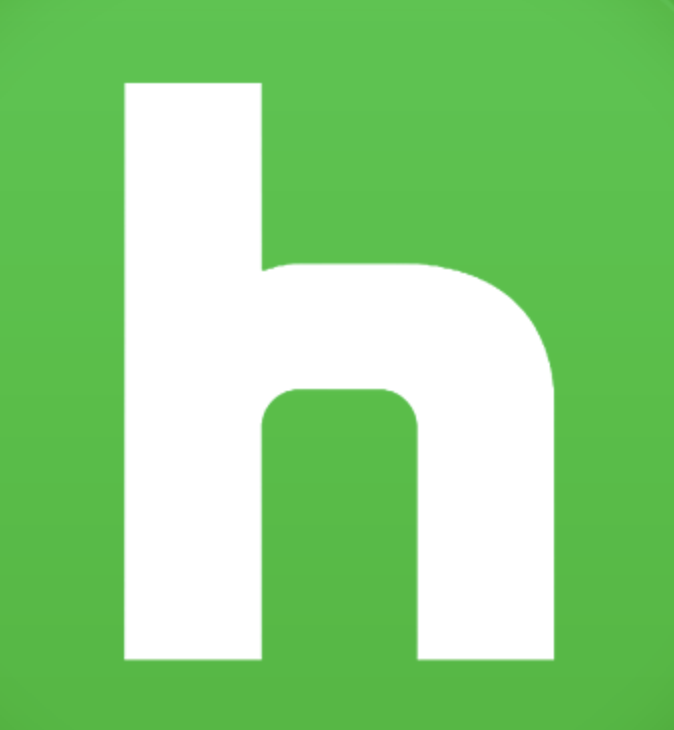

In [80]:
hl = folium.Map(location=[20, 0], zoom_start=2)
geo_json_url = 'https://raw.githubusercontent.com/datasets/geo-boundaries-world-110m/master/countries.geojson'

loc = 'Hulu - Country wise Content Production'

title_html = '''<h3 align="center" style="font-size:16px"><b>{}</b></h3>'''.format(loc)  

data = [{'coord':[38, -105], 'text': "United States of America (74.39%)", 'iconsize':(20,20)},
        {'coord': [35, 137], 'text': "Japan (12.66%)", 'iconsize':(20,20)},
        {'coord': [53,2], 'text': 'United Kingdom (3.68%)', 'iconsize':(20,20)}]
for i in range(len(data)):
    hulu_icon = folium.features.CustomIcon('huluicon.png', icon_size=data[i]['iconsize'])
    folium.Marker(data[i]['coord'], icon=hulu_icon, popup=folium.Popup(data[i]['text']),).add_to(hl)

# hulu_icon = folium.features.CustomIcon('huluicon.png', icon_size=(20,20))
# folium.Marker([53, 2], icon=hulu_icon, popup=folium.Popup("United Kingdom (3.68%)")).add_to(hl)

folium.Choropleth(
    geo_data=geo_json_url,
    data=hulu_country,
    columns=['country_upd', 'count_log'],
    key_on='feature.properties.name',
    fill_color="Greens",
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name='Percentage of Content by Country',
    highlight=True,
    nan_fill_color="#ffffff",
    nan_fill_opacity=0.5
).add_to(hl)

hl.get_root().html.add_child(folium.Element(title_html))
# m.save('choropleth_map.html')
hl

<div class="alert alert-block alert-success">

**Key Findings:**

* Netflix has a lot of international content and is more widespread compared to Hulu.

* Netflix has 40.53% of the content from United States and the rest from the other parts of the world with India's being second highest with 13.64% and United Kingdom's being the third highest with 6.76%.

* Whereas Hulu has 74.39% of the content from United States alone and 12.66% and 3.68% from Japan and United Kingdom respectively.

* We can conclude that Netflix has more market internationally compared to Hulu which has its majority of the market from United States.

<div class="alert alert-block alert-warning">

**3. Comparing the number of content added by genre on Netflix and Hulu over time.**

In [81]:
# Counting the number of genres in the Hulu dataset
genre_counts = {}
for row in df_hulu.iterrows():
    lst = row[1]['listed_in'].split(',')
    for genre in lst:
        genre = genre.strip()
        if genre not in genre_counts:
            genre_counts[genre] = 1
        else:
            genre_counts[genre] += 1
genre_counts = {k: v for k, v in sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)}

In [82]:
# Counting the number of genres in the Netflix dataset
genre_counts = {}
for row in df_netflix.iterrows():
    lst = row[1]['listed_in'].split(',')
    for genre in lst:
        genre = genre.strip()
        if genre not in genre_counts:
            genre_counts[genre] = 1
        else:
            genre_counts[genre] += 1
genre_counts = {k: v for k, v in sorted(genre_counts.items(), key=lambda item: item[1], reverse=True)}

In [83]:
# One hot encode given genre
def one_hot_genre(listed_in, genre):
    lst = list(set(listed_in.split(',')))
    for i in lst:
        if genre in i:
            return 1
    return 0

In [84]:
# Add one hot encoded columns for top genres in df
hulu_genres_df = df[df['service'] == 'hulu'].copy()
net_genres_df = df[df['service'] == 'netflix'].copy()
genre_list = ['international', 'drama', 'comed', 'action', 'docu', 'thriller', 'roman', 'anime']
for genre in genre_list:
    hulu_genres_df[genre] = hulu_genres_df['listed_in'].apply(lambda row: one_hot_genre(row, genre))
    net_genres_df[genre] = net_genres_df['listed_in'].apply(lambda row: one_hot_genre(row, genre))

In [85]:
genre_map = {
    'international': 'International',
    'drama': 'Drama',
    'comed': 'Comedy', 
    'action': 'Action',
    'docu': 'Documentary',
    'thriller': 'Thriller',
    'roman': 'Romance',
    'anime': 'Anime'
}

colormap = {
    'international': '#ff595e',
    'drama': '#ffca3a',
    'comed': '#8ac926',
    'docu': '#1982c4',
    'anime': '#6a4c93'
}

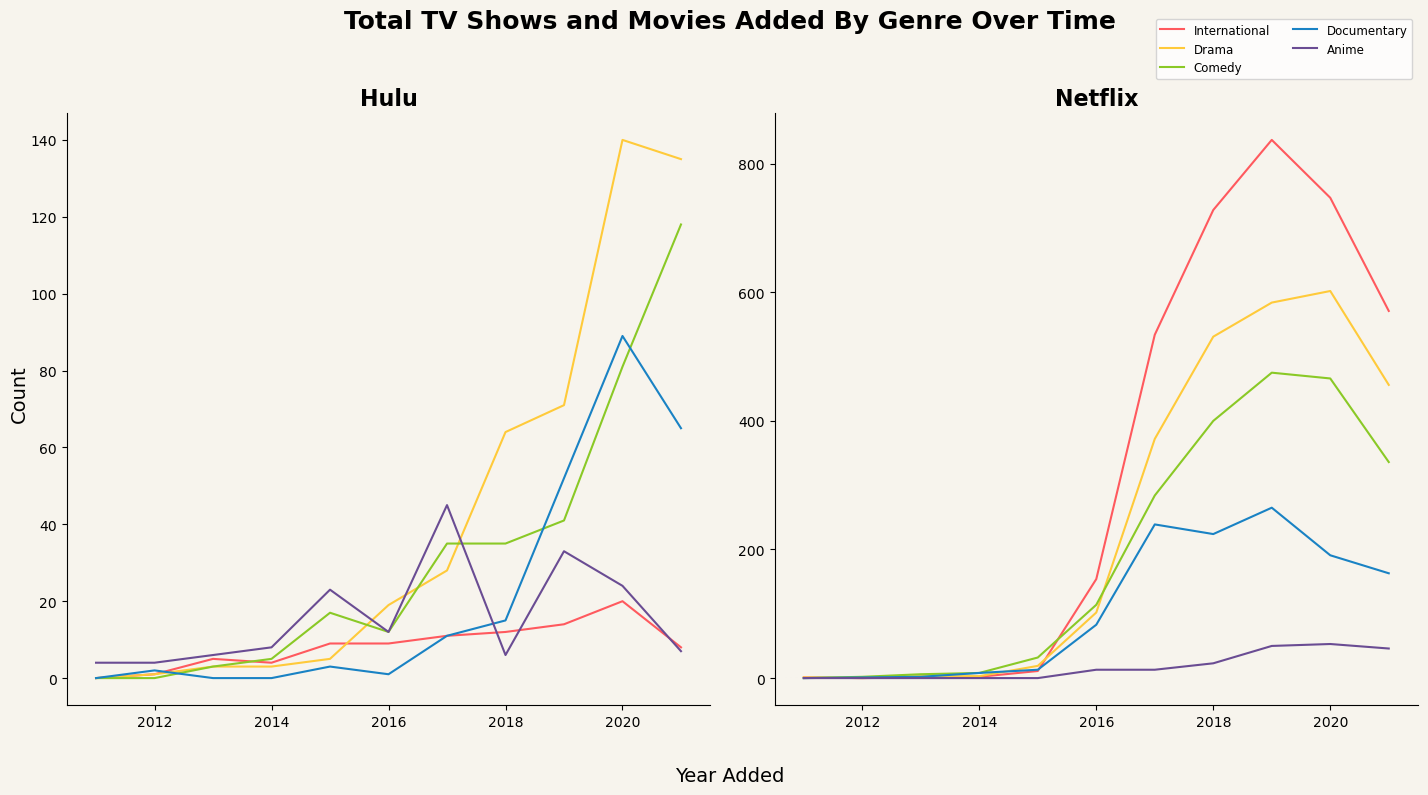

In [86]:
fig, ax = plt.subplots(figsize=(16,8), nrows=1, ncols=2)
genre_list = ['international', 'drama', 'comed', 'docu', 'anime']
for genre in genre_list:
    hulu_grouped = hulu_genres_df.groupby('year')[genre].sum()
    net_grouped = net_genres_df.groupby('year')[genre].sum()
    ax[0].plot(hulu_grouped, color = colormap[genre], label=genre_map[genre])
    ax[1].plot(net_grouped, color = colormap[genre], label=genre_map[genre])

ax[0].set_title('Hulu', fontsize=16, weight='bold')
ax[1].set_title('Netflix', fontsize=16, weight='bold')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[0].set_facecolor(color='#f7f4ed')
ax[1].set_facecolor(color='#f7f4ed')

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.9, 0.975), ncol=2, fontsize=8.5)
fig.suptitle('Total TV Shows and Movies Added By Genre Over Time', weight='bold', x=0.47, ha='center', size=18)
fig.supxlabel('Year Added', x=0.47, ha='center', size=14)
fig.supylabel('Count', size=14)
fig.patch.set_facecolor('#f7f4ed')
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.subplots_adjust(top=0.85)
plt.subplots_adjust(left=0.0555)
plt.show()

<div class="alert alert-block alert-success">

**Key Findings:**

* Netflix adds a lot more international content compared to Hulu. This could be due to Netflix being available in more countries so they add content that can cater to many demographics of users.

* Hulu focuses a lot more on dramas ad in the more recent years have had a sharp increase in comedy and documentaries being added.

* Compared to Netflix, Hulu adds more anime content. This may be due to Hulu only being available in the US and Japan, making them place more emphasis on the Japanese audience as opposed to Netflix's target audience.

<div class="alert alert-block alert-warning">

**4. Comparing the proportion of content added in each year for top genres between Netflix and Hulu.**

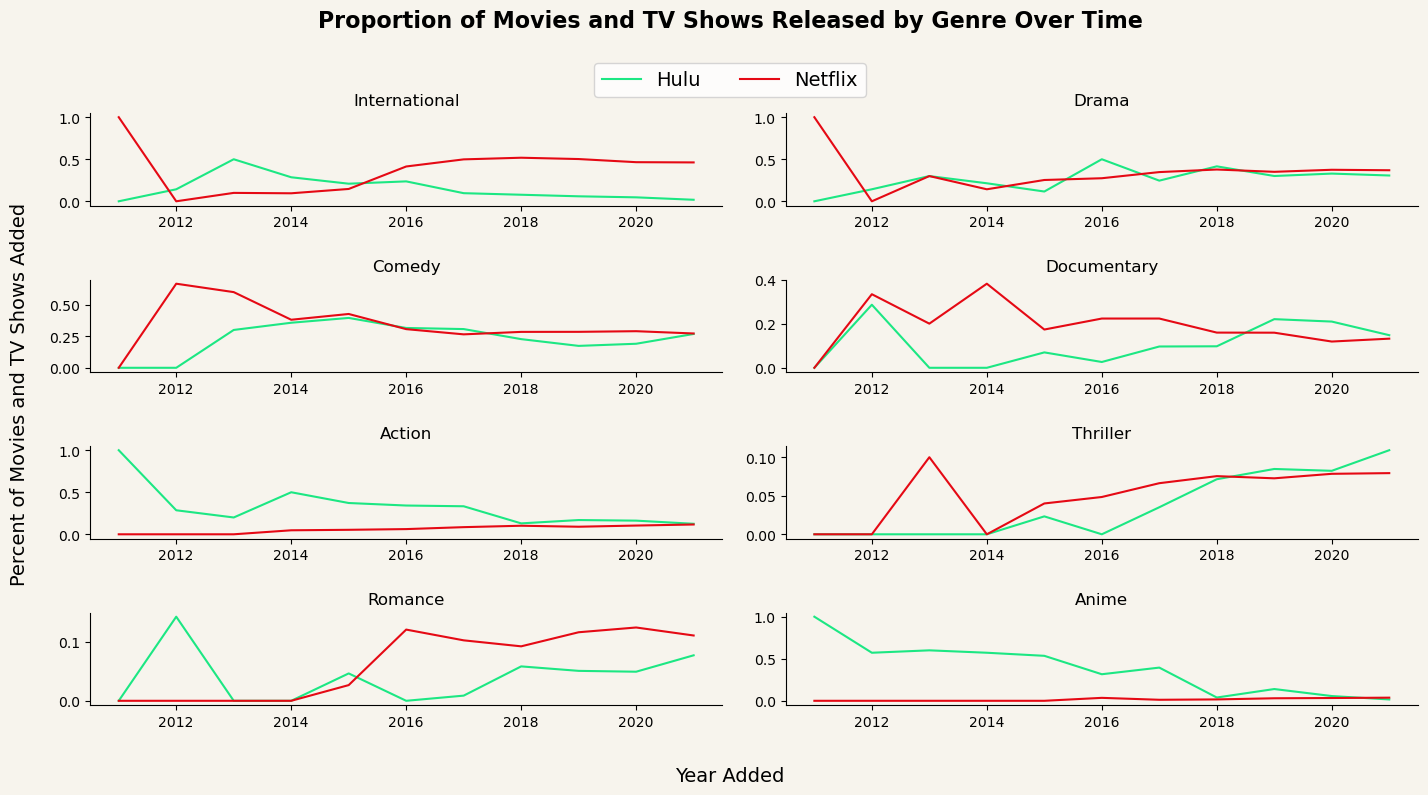

In [87]:
fig, ax = plt.subplots(figsize=(16,8), nrows=4, ncols=2)
ax_ind = [[0,0], [0,1], [1,0], [1,1], [2,0], [2,1], [3,0], [3,1]]
genre_list = ['international', 'drama', 'comed', 'docu', 'action', 'thriller', 'roman', 'anime']
for ind, genre in zip(ax_ind, genre_list):
    hulu_grouped = hulu_genres_df.groupby('year')[genre].mean()
    net_grouped = net_genres_df.groupby('year')[genre].mean()
    ax[ind[0], ind[1]].plot(hulu_grouped, color = '#1ce783', label='Hulu')
    ax[ind[0], ind[1]].plot(net_grouped, color = '#E50914', label='Netflix')
    ax[ind[0], ind[1]].set_title(genre_map[genre])
    ax[ind[0], ind[1]].spines['top'].set_visible(False)
    ax[ind[0], ind[1]].spines['right'].set_visible(False)
    ax[ind[0], ind[1]].set_facecolor(color='#f7f4ed')

handles, labels = ax[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.47, 0.925), ncol=2, fontsize=14)
fig.suptitle('Proportion of Movies and TV Shows Released by Genre Over Time', weight='bold', x=0.47, ha='center', size=16)
fig.supxlabel('Year Added', x=0.47, ha='center', size=14)
fig.supylabel('Percent of Movies and TV Shows Added', size=14)
fig.patch.set_facecolor('#f7f4ed')
plt.subplots_adjust(wspace=0.1, hspace=0.8)
plt.subplots_adjust(top=0.85)
plt.subplots_adjust(left=0.07)
plt.show()
    

<div class="alert alert-block alert-success">

**Key Findings:**

* In recent years, Netflix has been consistent in the proportion of their content added being international movies or shows.

* Hulu has had a steady increase in the thriller and documentary categories perhaps seeing increased demand in those areas of entertainment.

* In relation to other genres of content added, Netflix has never placed much emphasis on the anime category.

<div class="alert alert-block alert-warning">

**5. Comparing the number of content added based on age group between Netflix and Hulu.**

In [51]:
# Ensure the mapping for age groups includes all unique ratings
age_groups = {
    'G': 'Kids',
    'TV-Y': 'Kids',
    'TV-Y7': 'Kids',
    'TV-G': 'Kids',
    'PG': 'Teens',
    'PG-13': 'Teens',
    'TV-PG': 'Teens',
    'TV-14': 'Teens',
    'R': 'Adults',
    'NC-17': 'Adults',
    'TV-MA': 'Adults',
    'NR': 'Adults',
    'UR': 'Adults',
    'TV-Y7-FV': 'Kids',
    'pg-13': 'Teens',
    'tv-ma': 'Adults',
    'pg': 'Teens',
    'tv-14': 'Teens',
    'tv-pg': 'Teens',
    'tv-y': 'Kids',
    'tv-y7': 'Kids',
    'r': 'Adults',
    'tv-g': 'Kids',
    'g': 'Kids',
    'nc-17': 'Adults',
    'nr': 'Adults',
    'tv-y7-fv': 'Kids',
    'ur': 'Adults'
}

df['age_group'] = df['rating'].map(age_groups)

filther_col = ['type', 'release_year', 'age_group', 'year', 'service']
df_age = df[filther_col]

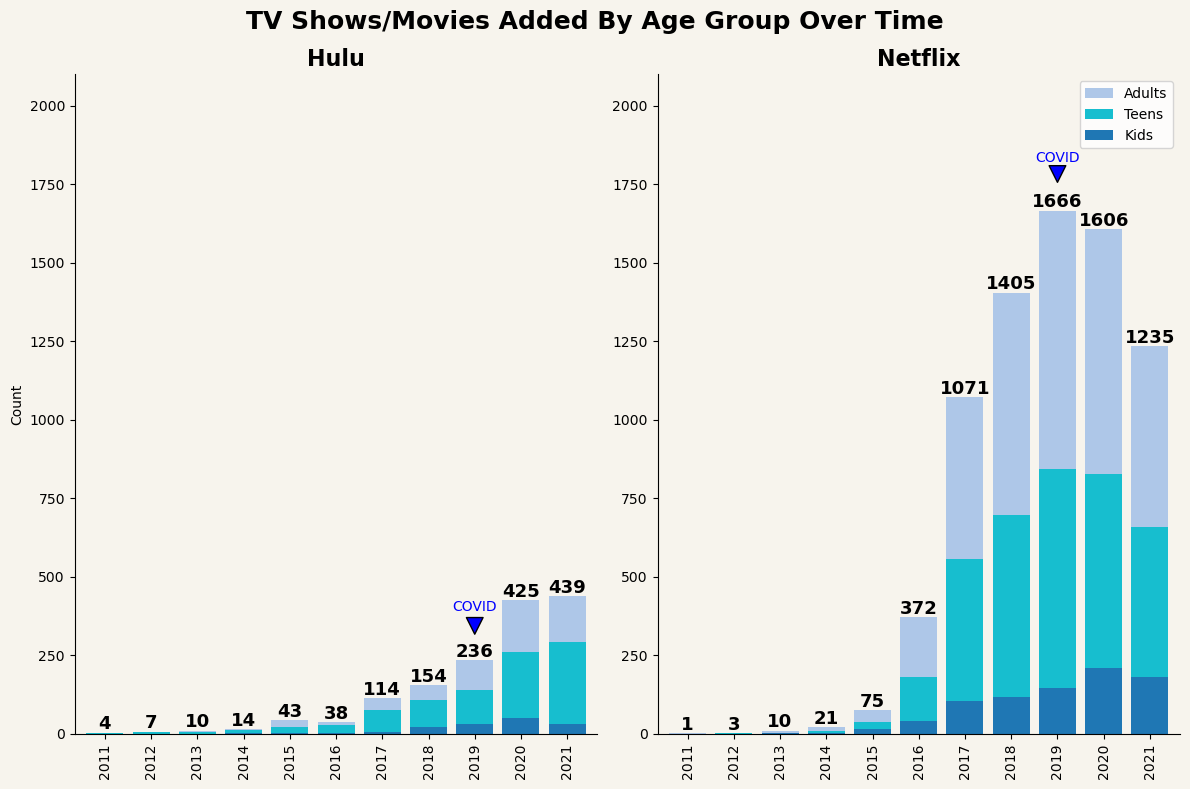

In [59]:
# Create pivot tables for Hulu and Netflix
df_hulu = df_age[df_age['service'] == 'hulu']
df_netflix = df_age[df_age['service'] == 'netflix']

# Group by year and age group to get the counts
piv_hulu = pd.crosstab(df_hulu['year'], df_hulu['age_group'])
piv_netflix = pd.crosstab(df_netflix['year'], df_netflix['age_group'])

# Desired order
desired_order = ['Kids', 'Teens', 'Adults']
piv_hulu = piv_hulu[desired_order]
piv_netflix = piv_netflix[desired_order]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

'#1ce783'
# hulu

'#E50914'
# netflix

# Plot 1: Hulu
ax1 = piv_hulu.plot.bar(stacked=True, ax=ax1, color=['#1F77B4', '#17BECF', '#AEC7E8'], width=0.8)
ax1.set_xlabel('')
ax1.set_ylabel('Count')
ax1.set_ylim(0, 2100)  # Set the y-axis limit
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_facecolor('#f5efe1')

# Manually sum and label the top of the bars for Hulu
for x, y in enumerate(piv_hulu.sum(axis=1)):
    ax1.annotate(y, (x, y + 10), ha='center', fontsize=13, color='black', weight='bold')

# Plot 2: Netflix
ax2 = piv_netflix.plot.bar(stacked=True, ax=ax2, color=['#1F77B4', '#17BECF', '#AEC7E8'], width=0.8)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_ylim(0, 2100)  # Set the y-axis limit
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_facecolor('#f5efe1')

# Manually sum and label the top of the bars for Netflix
for x, y in enumerate(piv_netflix.sum(axis=1)):
    ax2.annotate(y, (x, y + 10), ha='center', fontsize=13, color='black', weight='bold')

# Custom legend order and formatting
for ax in [ax1, ax2]:
    handles, labels = ax.get_legend_handles_labels()
    order = [2, 1, 0]  # Adults, Teens, Kids
    ax.legend([handles[idx] for idx in order], [labels[idx] for idx in order])

# Annotate 2018 as COVID year
ax1.annotate('COVID', xy=(8, 310), xytext=(8, 390),
             arrowprops=dict(facecolor='blue', shrink=0.1),
             fontsize=10, color='blue', ha='center')

# Annotate 2018 as COVID year
ax2.annotate('COVID', xy=(8, 1750), xytext=(8, 1820),
             arrowprops=dict(facecolor='blue', shrink=0.1),
             fontsize=10, color='blue', ha='center')

# titles
fig.suptitle('TV Shows/Movies Added By Age Group Over Time', weight='bold', ha='center', size=18)
ax1.set_title('Hulu', fontsize=16, weight='bold', ha = 'center')
ax2.set_title('Netflix', fontsize=16, weight='bold', ha = 'center')


# Remove legend in plot 0
ax1.get_legend().remove()


ax1.set_facecolor(color='#f7f4ed')
ax2.set_facecolor(color='#f7f4ed')
fig.patch.set_facecolor('#f7f4ed')
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.subplots_adjust(top=0.85)
plt.subplots_adjust(left=0.0555)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

**Key Findings:**

* Both Hulu and Netflix have strategic content additions that cater to different age groups, with a notable emphasis on teens and adults.

* Netflix’s diverse and increasing content for adults and teens highlights its focus on these demographics, ensuring that subscribers in these groups have plenty of new content to explore each year.

* Hulu’s consistent addition of TV shows, particularly for teens and adults, makes it a strong contender for viewers who prefer series-based content.

<div class="alert alert-block alert-warning">

**6. Looking at content added by season between Netflix and Hulu using quarterly data.**

In [53]:
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Map quarters to seasons
df['season_added'] = df['date_added'].dt.quarter.map({
    1: 'Fall',
    2: 'Spring',
    3: 'Summer',
    4: 'Winter'
})

In [54]:
# function to calculate percentages and totals
def add_annotations(ax, df, total_size, percentage_size):
    for container in ax.containers:
        totals = df.sum(axis=1)
        for i, bar in enumerate(container):
            height = bar.get_height()
            percentage = height / totals[i] * 100
            ax.annotate(f'{percentage:.1f}%', (bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                        ha='center', va='center', fontsize=percentage_size, color='white', weight='bold')

    for i, total in enumerate(df.sum(axis=1)):
        ax.annotate(f'{total}', (i, total),
                    ha='center', va='bottom', fontsize=total_size, color='black', weight='bold')

/var/folders/3j/84vfyxg527qb8vxdqgjv0r080000gn/T/ipykernel_38022/351580620.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = height / totals[i] * 100
/var/folders/3j/84vfyxg527qb8vxdqgjv0r080000gn/T/ipykernel_38022/351580620.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage = height / totals[i] * 100
/var/folders/3j/84vfyxg527qb8vxdqgjv0r080000gn/T/ipykernel_38022/351580620.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, u

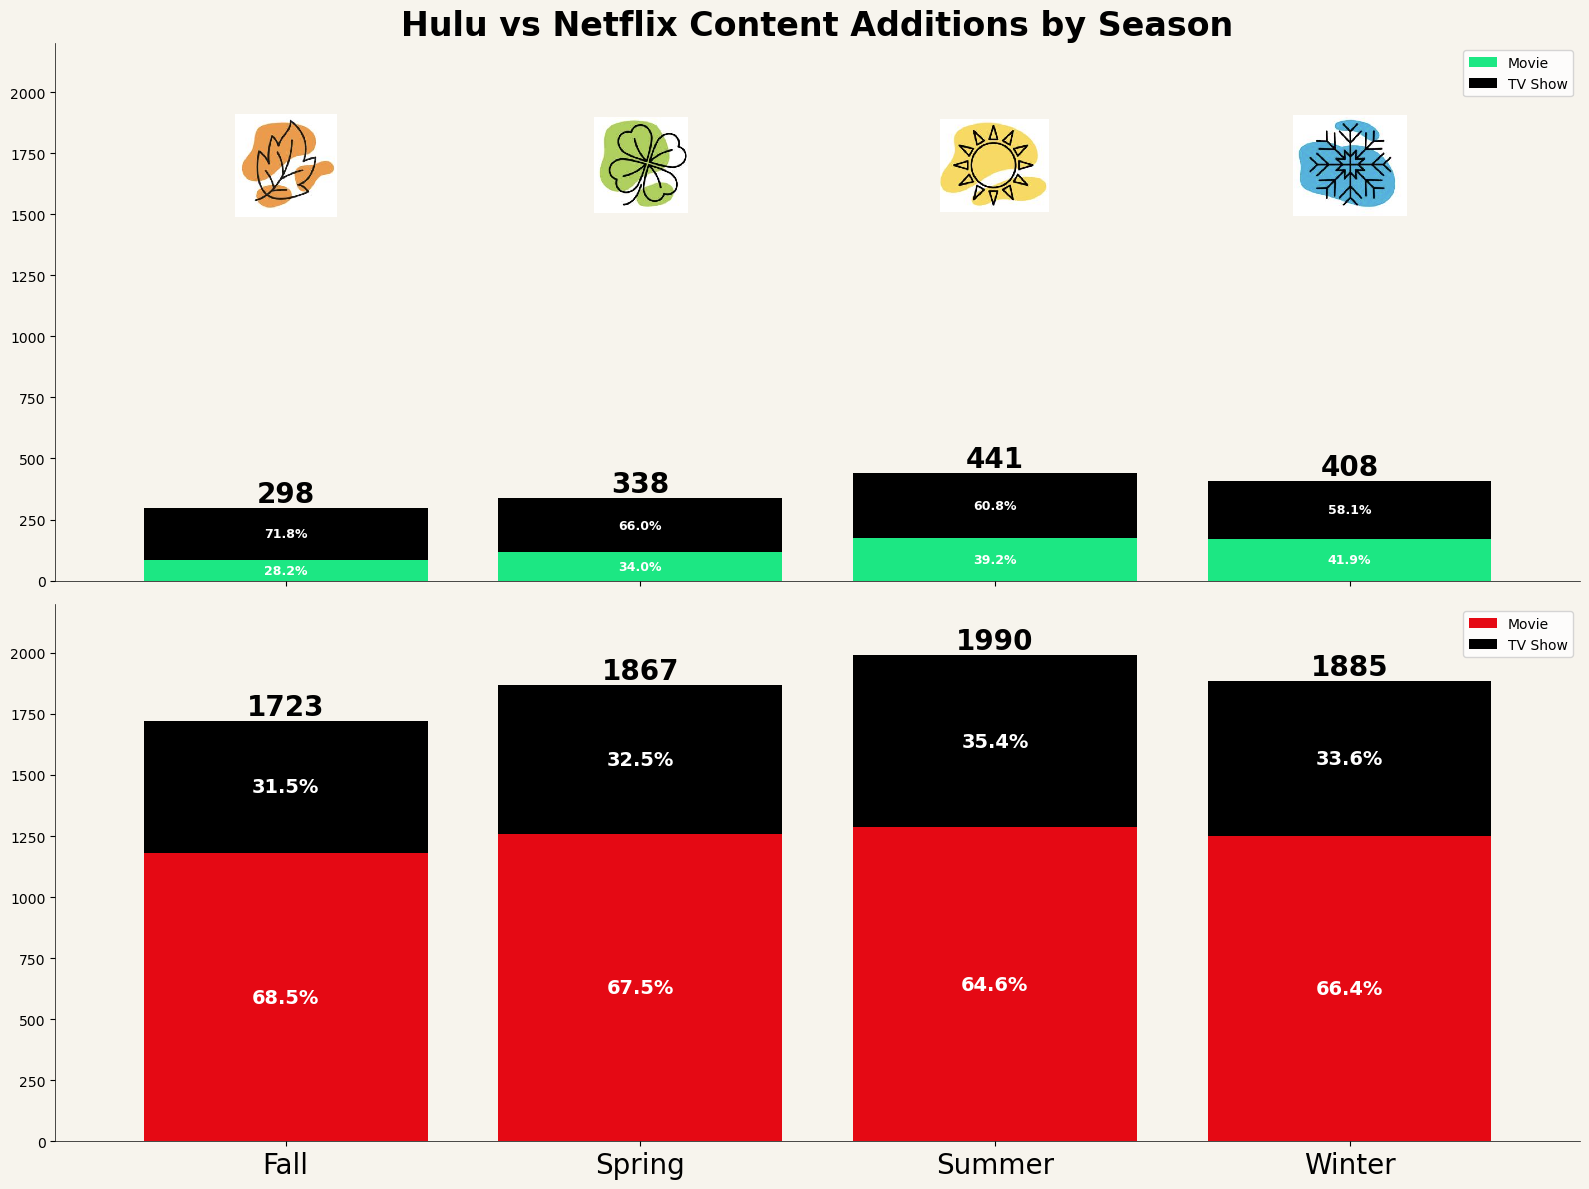

In [55]:
# Load the images
fall_img = mpimg.imread('fall.png')
spring_img = mpimg.imread('spring.png')
summer_img = mpimg.imread('summer.png')
winter_img = mpimg.imread('winter.png')

# Split the data into Hulu and Netflix
df_hulu = df[df['service'] == 'hulu']
df_netflix = df[df['service'] == 'netflix']

# Group by season and type to get the counts for Hulu
df_seasonal_hulu = df_hulu.groupby(['season_added', 'type']).size().unstack(fill_value=0)

# Group by season and type to get the counts for Netflix
df_seasonal_netflix = df_netflix.groupby(['season_added', 'type']).size().unstack(fill_value=0)

# Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 12))

# Custom colors and edgecolors
hulu_colors = ['#1ce783', 'black', '#1ce783', '#1ce783']
netflix_colors = ['#E50914', 'black', '#E50914', '#E50914']


# Hulu
df_seasonal_hulu.plot(kind='bar', stacked=True, ax=ax1, color=hulu_colors, width=0.8)
ax1.set_title('Hulu vs Netflix Content Additions by Season', fontsize=24, weight='bold')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_ylim(0, 2200)  # Set the y-axis limit
ax1.set_xticklabels([])
ax1.spines['left'].set_linewidth(.5)
ax1.spines['bottom'].set_linewidth(.5)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
add_annotations(ax1, df_seasonal_hulu, 20, 9)

# Netflix
df_seasonal_netflix.plot(kind='bar', stacked=True, ax=ax2, color=netflix_colors, width=0.8)
ax2.set_title('')
ax2.set_xlabel('')
ax2.set_xticklabels(['Fall', 'Spring', 'Summer', 'Winter'], rotation=360, fontsize=20)  # Change tick font size
ax2.set_ylim(0, 2200)  # Set the y-axis limit
ax2.spines['left'].set_linewidth(.5)
ax2.spines['bottom'].set_linewidth(.5)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
add_annotations(ax2, df_seasonal_netflix, 20, 14)

# Add seasonality images to Hulu plot
season_images = {
    'Fall': fall_img,
    'Spring': spring_img,
    'Summer': summer_img,
    'Winter': winter_img
}

for i, season in enumerate(['Fall', 'Spring', 'Summer', 'Winter']):
    image = season_images[season]
    im = OffsetImage(image, zoom=0.2)
    ab = AnnotationBbox(im, (i, 1700), frameon=False, box_alignment=(0.5, 0.5))
    ax1.add_artist(ab)

# Custom legend for both plots
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles, ['Movie', 'TV Show'], loc='upper right', fontsize=10)
handles, labels = ax2.get_legend_handles_labels()
ax2.legend(handles, ['Movie', 'TV Show'], loc='upper right', fontsize=10)

ax1.set_facecolor(color='#f7f4ed')
ax2.set_facecolor(color='#f7f4ed')
fig.patch.set_facecolor('#f7f4ed')
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.subplots_adjust(top=0.85)
plt.subplots_adjust(left=0.0555)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

**Key Findings:**

- Hulu:
  - **Content Peaks:** Highest number of new shows and movies in Summer
  - **Focus:** Majority of new content are TV shows, offering plenty of series to binge-watch.
  - **Numbers:** only adds around 200 shows/movies per season
- Netflix:
  - **Content Peaks:** consistent content additions across all seasons
  - **Focus:** Majority of new content are Moives, offering endless moive nights.
  - **Numbers:** adds a whompy 1800 shows/movies per season

Customer Insights:
- Hulu:
  - **Variety:** Expect a rich selection of TV shows, especially in Winter. Ideal for those who love following multiple series.
  - **New Additions:** Keep an eye out for significant updates in Winter
- Netflix:
  - **Diverse Options:** Enjoy a balanced variety of movies and TV shows and endless selections.
  - **Year-Round Updates:** Benefit from consistent content updates

Conclusion
- **Recommendation:** From a customer's point of view, Netflix is the better choice due to the sheer amount of selctions whehter its TV shows or movies. Netflix has consistent amount of content year-round updates and its diverse options ensure that there is always something new and exciting to watch, catering to a wide range of viewing preferences.